<a href="https://colab.research.google.com/github/KIMCAT33/Tensorflow-2.0/blob/master/TensorFlow_2_0%EC%9C%BC%EB%A1%9C_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EA%B5%AC%EC%B6%95%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1>Fashion MNIST with Tensorflow 2.0 and Keras</H1>

![alt text](https://cloudxlab.com/blog/wp-content/uploads/2019/06/Tensorflow_Keras.png)


Image source: https://cloudxlab.com/blog/fashion-mnist-using-deep-learning-with-tensorflow-keras/

## Stage 1: Installing dependencies and setting up GPU environment

In [3]:
!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 85kB/s 
     |████████████████████████████████| 419kB 47.0MB/s 
     |████████████████████████████████| 3.0MB 52.1MB/s 


## Stage 2: Import dependencies for the project

In [0]:
import numpy as np
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [5]:
tf.__version__

'1.14.0'

## Stage 3: Dataset preprocessing




### 데이터 셋 불러오기

In [6]:
#Fashion Mnist dataset 로드하기
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Fashion-MNIST 데이터셋에는 10개의 카테고리가 있습니다.

레이블 설명

0 티셔츠/탑
1 바지
2 풀오버(스웨터의 일종)
3 드레스
4 코트
5 샌들
6 셔츠
7 스니커즈
8 가방
9 앵클 부츠

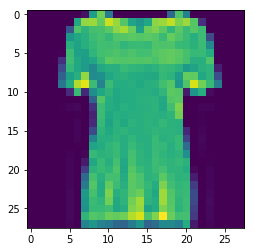

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X_train[10])

### 이미지 정규화

픽셀이 가질 수 있는 값의 최대값인 255로 훈련 데이터와 테스트 데이터셋을 나눠줍니다. 

이러한 방법으로 각각의 픽셀은 [0, 1] 범위의 값을 가질 것입니다. 이미지를 정규화함으로써 인공 신경망이 학습을 더 빠르고 정확하게 해줍니다. 

In [0]:
X_train = X_train / 255.0

In [0]:
X_test = X_test / 255.0

### 데이터 셋 크기 조정
여기서 완전연결네트워크(Fully-connected network)모델을 사용할 것이므로, 우리는 훈련 데이터와 테스트 데이터 셋을 vector형태(1차원 행렬)로 바꿔주어야 합니다. 


In [0]:
# 각각의 이미지의 사이즈가 28(세로)x28(가로) 이므로, 데이터의 사이즈를 [-1 (모든 데이터 셋), 세로*가로 ]로 조정해줍니다.
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [22]:
X_train.shape

(60000, 784)

## Stage 4: Building an Artificial Neural network

### 모델 정의하기
간단히 Sequential 모델의 객체를 정의합니다. 여기서 우리는 tensorflow 내의 고수준 API인 Keras를 이용해 간단히 완전연결네트워크를 구현해보겠습니다.

In [0]:
model = tf.keras.models.Sequential() ## model.Sequential() 메서드를 통해서 레이어 셋트를 정의해줍니다.

### 첫 번째 레이어(Dense 층) 추가하기

Layer hyper-parameters:
- number of units/neurons: 128 : 레이어의 노드 수
- activation function: ReLU   : 활성화 함수
- input_shape: (784, ) : 입력 데이터의 사이즈

>Q) 활성화 함수가 무엇인가요?

> 활성화 함수는 입력데이터의 값이 가중치(w)와 편향(b)와 합쳐져 노드로 들어왔을 때 그 값을 변환해주어 비선형적인 구조도 해석할 수 있게 도와줍니다. 

이번 실습에서는 0보다 크면 본래 값을 return 해주고 0보다 작으면 0으로 return 해주는 'Relu(Rectifier Linear Unit)'를 사용하였습니다.

![alt text](https://c.mql5.com/2/35/artificialneuron__1.gif)

Image source:
https://www.mql5.com/en/blogs/post/724245

In [0]:
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))

### 드롭아웃(Dropout) 층 추가하기
> 드롭아웃은 층 안에 있는 노드(뉴런)을 랜덤하게 0으로 만들어 모델을 일반화하는 기법입니다. 훈련 과정 중에서 몇몇 노드(뉴런)은 업데이트 되지 않게 하는데 이 방법을 통해 모델이 훈련데이터에 오버피팅될 가능성을 줄여줍니다. 

오버피팅 : 모델이 훈련 데이터의 패턴을 너무 많이 학습하여 새로운 데이터에 대한 예측을 제대로 하지 못하는 상태를 말합니다. 우리는 모델이 어떠한 데이터에 있어서도 좋은 성과가 나오도록 일반화를 하는 것을 목표로 하여야 합니다!

In [0]:
model.add(tf.keras.layers.Dropout(0.2)) # 전체 노드의 20%만 Dropout을 적용하겠습니다.

### 두번 째 층 추가하기 - 출력층(output layer)

- units == number of classes (이는 우리가 결과로 가질 수 있는 값의 수 입니다. Fashion MNIST에서는 10 입니다.) 
- activation = 'softmax' (softmax 함수는 결과로 나온 전체 값의 합을 0과 1사이로 반환해줍니다.)

In [0]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

### 모델 컴파일하기

- Optimizer: Adam (손실 함수의 결과를 어떤 방식으로 최적화 할 것인가?)
- Loss: Sparse softmax (categorical) crossentropy (분류 문제에 대한 손실 함수)

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [19]:
model.summary() # 네트워크 구성 확인하기 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


첫 번째 Dense층에서 파라미터가 100480개인데 이는 784(입력 데이터 수) * 128(w가중치의 개수) + 128(편향의 수) = 100,480개로 계산할 수 있습니다.

마찬가지로 두 번째 Dense층은 128(앞의 층의 노드 수) x 10 + 10 = 1290개로 계산할 수 있습니다.

총 파라미터 수는 각 층의 파라미터 수를 합쳐주면 됩니다. 간단한 모델이지만 학습해가며 101,770개의 파라미터(숫자)를 수정하면서 모델을 최적화시켜 나갑니다. 

### 모델 학습시키기

In [20]:
model.fit(X_train, y_train, epochs=5) # 전체 sample 데이터를 이용하여 한 바퀴 돌며 학습하는 것을 1회 epoch이라 부릅니다. 5번 epochs으로 학습시켜 보겠습니다.

Epoch 1/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.5288 - sparse_categorical_accuracy: 0.8128
Epoch 2/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3980 - sparse_categorical_accuracy: 0.8561
Epoch 3/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3673 - sparse_categorical_accuracy: 0.8654
Epoch 4/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3446 - sparse_categorical_accuracy: 0.8727
Epoch 5/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3299 - sparse_categorical_accuracy: 0.8792


Epoch이 늘어가며 loss가 줄어드는 것을 볼 수 있습니다. 이것이 바로 학습이 되어 정확도가 올라가고 있다는 것을 알 수 있는 대목입니다.

### 모델 평가와 예측

In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test) # 이제 테스트 데이터를 사용하여 우리가 학습시킨 모델이 얼마의 정확도를 가지는지 한 번 테스트해봅시다

10000/10000 [==============================] - 1s 58us/sample - loss: 0.3584 - sparse_categorical_accuracy: 0.8709


In [25]:
print("Test accuracy: {}".format(test_accuracy)) # 정확도가 약 87%정도 나오네요! 10가지 클래스에 관해서 랜덤하게 예측했을 때 

Test accuracy: 0.8708999752998352


## Stage 5 : 모델 저장하기





### 네트워크 구조(토폴로지) 저장하기

In [0]:
model_json = model.to_json()
with open("fashion_model.json", "w") as json_file:
    json_file.write(model_json)

### 네트워크 가중치 저장하기

In [0]:
model.save_weights("fashion_model.h5")